In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')
df.head()
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'State', 'Age',
       'python', 'r_studio', 'spark', 'aws', 'excel', 'job_simplified',
       'seniority', 'desc_length'],
      dtype='object')

In [11]:
df_model=df[['avg_salary','Rating','Size','Industry','Sector','State','Revenue','Age','python','spark','r_studio','aws','job_simplified','seniority','desc_length','Type of ownership']]

In [12]:
df_model.head()

,avg_salary,Rating,Size,Industry,Sector,State,Revenue,Age,python,spark,r_studio,aws,job_simplified,seniority,desc_length,Type of ownership
0,142.0,3.2,501 to 1000 Employees,Video Games,Media,CA,$50 to $100 million (USD),18,0,0,0,0,data scientist,senior,1165,Subsidiary or Business Segment
1,123.0,3.7,1001 to 5000 Employees,Aerospace & Defense,Aerospace & Defense,VA,$1 to $2 billion (USD),3,0,0,0,0,data scientist,na,1020,Company - Private
2,56.5,3.6,1001 to 5000 Employees,Real Estate,Real Estate,NC,$50 to $100 million (USD),44,0,0,0,0,analyst,na,1014,Company - Private
3,75.5,3.3,1001 to 5000 Employees,Advertising & Marketing,Business Services,MI,Unknown / Non-Applicable,50,0,0,0,0,na,na,1064,Company - Private
4,71.5,3.1,201 to 500 Employees,Health Care Services & Hospitals,Health Care,WA,$100 to $500 million (USD),37,0,0,0,0,na,na,925,Company - Private


In [70]:
#Generating dummy data
df_dum = pd.get_dummies(df_model)

In [71]:
#Train test data
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
df_dum.avg_salary.values
y_train[34:70]

array([ 83. , 149.5, 153. , 121.5,  92. ,  89.5, 103.5, 115. , 115.5,
       127. , 115. , 132.5,  82. ,  83. , 121.5, 118.5,  79.5,  92. ,
        95. , 136.5,  92. , 118.5, 157. , 115.5, 128.5, 128.5,  93.5,
       133. , 149.5, 133.5, 112. ,  75.5, 127. , 136.5, 117.5, 141. ])

In [73]:
#Multiple linear regression mode
#using stats model
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2.760
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           6.24e-22
Time:                        13:53:00   Log-Likelihood:                -5264.3
No. Observations:                1217   AIC:                         1.085e+04
Df Residuals:                    1056   BIC:                         1.167e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                57.4741      4.445     12.929      0.000      48.751      66.197
Rating                                                0.8548      0.761      1.123      0.262      -0.639       2.348
Age                                                  -0.0552      0.025     -2.171      0.030      -0.105      -0.005
python                                               -0.3132      2.660     -0.118      0.906      -5.533       4.907
spark                                                 4.0346      4.672      0.863      0.388      -5.134      13.203
r_studio                                             13.8333     11.911      1.161      0.246      -9.538      37.205
aws                                                  -3.4114      3.123     -1.092      0.275      -9.539       2.716
desc_length                                           0.0002      0.001      0.253      0.800      -0.002       0.002
Size_-1                                               1.6940      1.963      0.863      0.388      -2.159       5.547
Size_1 to 50 Employees                                6.9136      2.703      2.558      0.011       1.609      12.218
Size_10000+ Employees                                 4.6454      3.085      1.506      0.132      -1.408      10.698
Size_1001 to 5000 Employees                          10.8821      2.172      5.011      0.000       6.621      15.144
Size_201 to 500 Employees                             7.6480      2.250      3.399      0.001       3.233      12.063
Size_5001 to 10000 Employees                         -1.9204      4.842     -0.397      0.692     -11.421       7.580
Size_501 to 1000 Employees                           15.3824      2.487      6.186      0.000      10.503      20.262
Size_51 to 200 Employees                              7.4907      2.188      3.424      0.001       3.198      11.783
Size_Unknown                                          4.7385      5.418      0.875      0.382      -5.893      15.370
Industry_-1                                           7.5580      2.405      3.143      0.002       2.839      12.277
Industry_Accounting                                   4.0391      3.445      1.173      0.241      -2.720      10.798
Industry_Advertising & Marketing                      9.6835      4.888      1.981      0.048       0.092      19.275
Industry_Aerospace & Defense                         -0.4628      1.772     -0.261      0.794      -3.939       3.013
Industry_Architectural & Engineering Services        -4.3273     15.542     -0.278      0.781     -34.825      26.170
Industry_Asphalt Products Manufacturing             -20.6967     19.235     -1.076      0.282     -58.440      17.047
Industry_Auto R

In [93]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-17.019465658857463

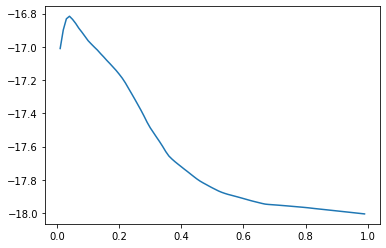

In [88]:
#Lasso regression
lm_l= Lasso(alpha =.04)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=5))
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [87]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns =['alpha','error'])
df_err[df_err.error ==max(df_err.error)]

,alpha,error
3,0.04,-16.815747


In [81]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5))

#Tuning models using GridSearch
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring = 'neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [83]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt')

In [90]:
#Test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rd = gs.best_estimator_.predict(X_test)


In [89]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rd))

350305.6733133536
16.295129542063616
13.671526639344263


In [97]:
mean_absolute_error(y_test,(tpred_lml+tpred_rd)/2)


14.668812596205752

In [95]:
mean_absolute_error(y_test,(tpred_lm+tpred_rd)/2)

175159.25250810655